### Zadanie domowe 2

Proszę skonstruować klasyfikator oparty na regresji logistycznej dla danych dotyczących jakości odbitego sygnału radarowego przez jonosferę, gdzie dla każdego przykładu jakość odbitego sygnału jest opisana atrybutem nominalnym przyjmującym jedną z dwóch możliwych wartości: 'b'  (ang. bad) i 'g' (ang. good). Model powinien dokonywać predykcji jakości odbitego sygnału radarowego na podstawie wartości wszystkich 34 atrybutów ciągłych. 

Dokładny opis danych jest dostępny na stronie https://archive.ics.uci.edu/ml/datasets/ionosphere, zaś pliki z danymi są dostępne pod adresem https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/. Dane znajdują się w pliku <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data">ionosphere.data</a> a dokładne informacje o tym zbiorze danych są zapisane w pliku <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.names">ionosphere.names</a>.

Do konstrukcji klasyfikatora należy użyć zbioru treningowego a do jego oceny zbioru testowego. Zbiory te powinny być utworzone przez podzielenie zbioru danych na części odpowiednio zawierające 80% i 20% wszystkich przykładów. Części te powinny charakteryzować się takim samym stosunkiem liczby obserwacji z klasy 'b' do liczby obserwacji z klasy 'g' co pełny zbiór danych. 

Rozwiązaniem powinien być plik .ipynb z kodem w Pythonie wczytującym dane, trenującym opisany klasyfikator i oceniającym jego możliwości predykcyjne. Ocena możliwości predykcyjnych skonstruowanego klasyfikatora powinna składać się z macierzy konfuzji (zwaną także macierzą błędów lub tablicą pomyłek, ang. *confusion matrix*), dokładności (ang. *accuracy score*), krzywej ROC oraz pola powierzchni AUC pod krzywą ROC obliczonych na podstawie danych testowych.  

##### Dodatkowe wskazówki:

1) Dane można wczytać z pliku za pomocą <a href="https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html">numpy.genfromtxt</a>.

2) Klasy 'b' (bad) i 'g' (good) należy zastąpić wartościami liczbowymi odpowiednio 0 i 1. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

%matplotlib inline

#### Preparing data from file
First we read data from file

In [2]:
file = 'ionosphere.data'
data = np.genfromtxt(file, delimiter=',', dtype=str)

And split it into arrays of features and labels

In [3]:
X = data[:, :-1].astype(np.float32)
y = np.array([0 if i == 'b' else 1 for i in data[:, -1]])

Now we split it into train and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#### Training the model

In [5]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

#### Running the model on test data

In [6]:
y_pred = model.predict(X_test)

#### Evaluating the model
##### Confusion matrix

In [7]:
confusion_matrix(y_test, y_pred)

array([[18,  7],
       [ 2, 44]])

##### Accuracy score

In [8]:
accuracy_score(y_test, y_pred)

0.8732394366197183

##### ROC curve

In [9]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

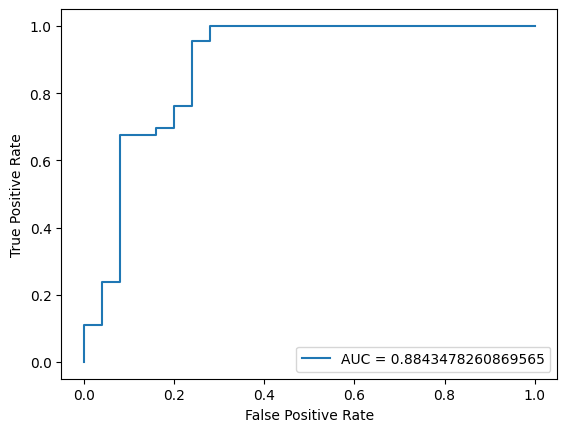

In [10]:
plt.plot(fpr, tpr, label=f'AUC = {auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()